In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
boston = load_boston()

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
dataset = boston.data

In [6]:
col = ['Crime_Rate', 'ZN', 'IndusrialArea', 'River', 'NitricOxide', 'Room', 'Age', 'Employementcenter', 'RoadAccess', 'Tax',
       'PTRatio', 'B', 'LowerPop']

In [7]:
dataset = pd.DataFrame(data=dataset, columns=col)

In [8]:
dataset.head()

,Crime_Rate,ZN,IndusrialArea,River,NitricOxide,Room,Age,Employementcenter,RoadAccess,Tax,PTRatio,B,LowerPop
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
dataset['Price']=boston.target

In [10]:
dataset.head()

,Crime_Rate,ZN,IndusrialArea,River,NitricOxide,Room,Age,Employementcenter,RoadAccess,Tax,PTRatio,B,LowerPop,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
dataset.shape

(506, 14)

In [12]:
dataset.isnull().sum()

Crime_Rate           0
ZN                   0
IndusrialArea        0
River                0
NitricOxide          0
Room                 0
Age                  0
Employementcenter    0
RoadAccess           0
Tax                  0
PTRatio              0
B                    0
LowerPop             0
Price                0
dtype: int64

In [13]:
dataset.describe()

,Crime_Rate,ZN,IndusrialArea,River,NitricOxide,Room,Age,Employementcenter,RoadAccess,Tax,PTRatio,B,LowerPop,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
Crime_Rate           506 non-null float64
ZN                   506 non-null float64
IndusrialArea        506 non-null float64
River                506 non-null float64
NitricOxide          506 non-null float64
Room                 506 non-null float64
Age                  506 non-null float64
Employementcenter    506 non-null float64
RoadAccess           506 non-null float64
Tax                  506 non-null float64
PTRatio              506 non-null float64
B                    506 non-null float64
LowerPop             506 non-null float64
Price                506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


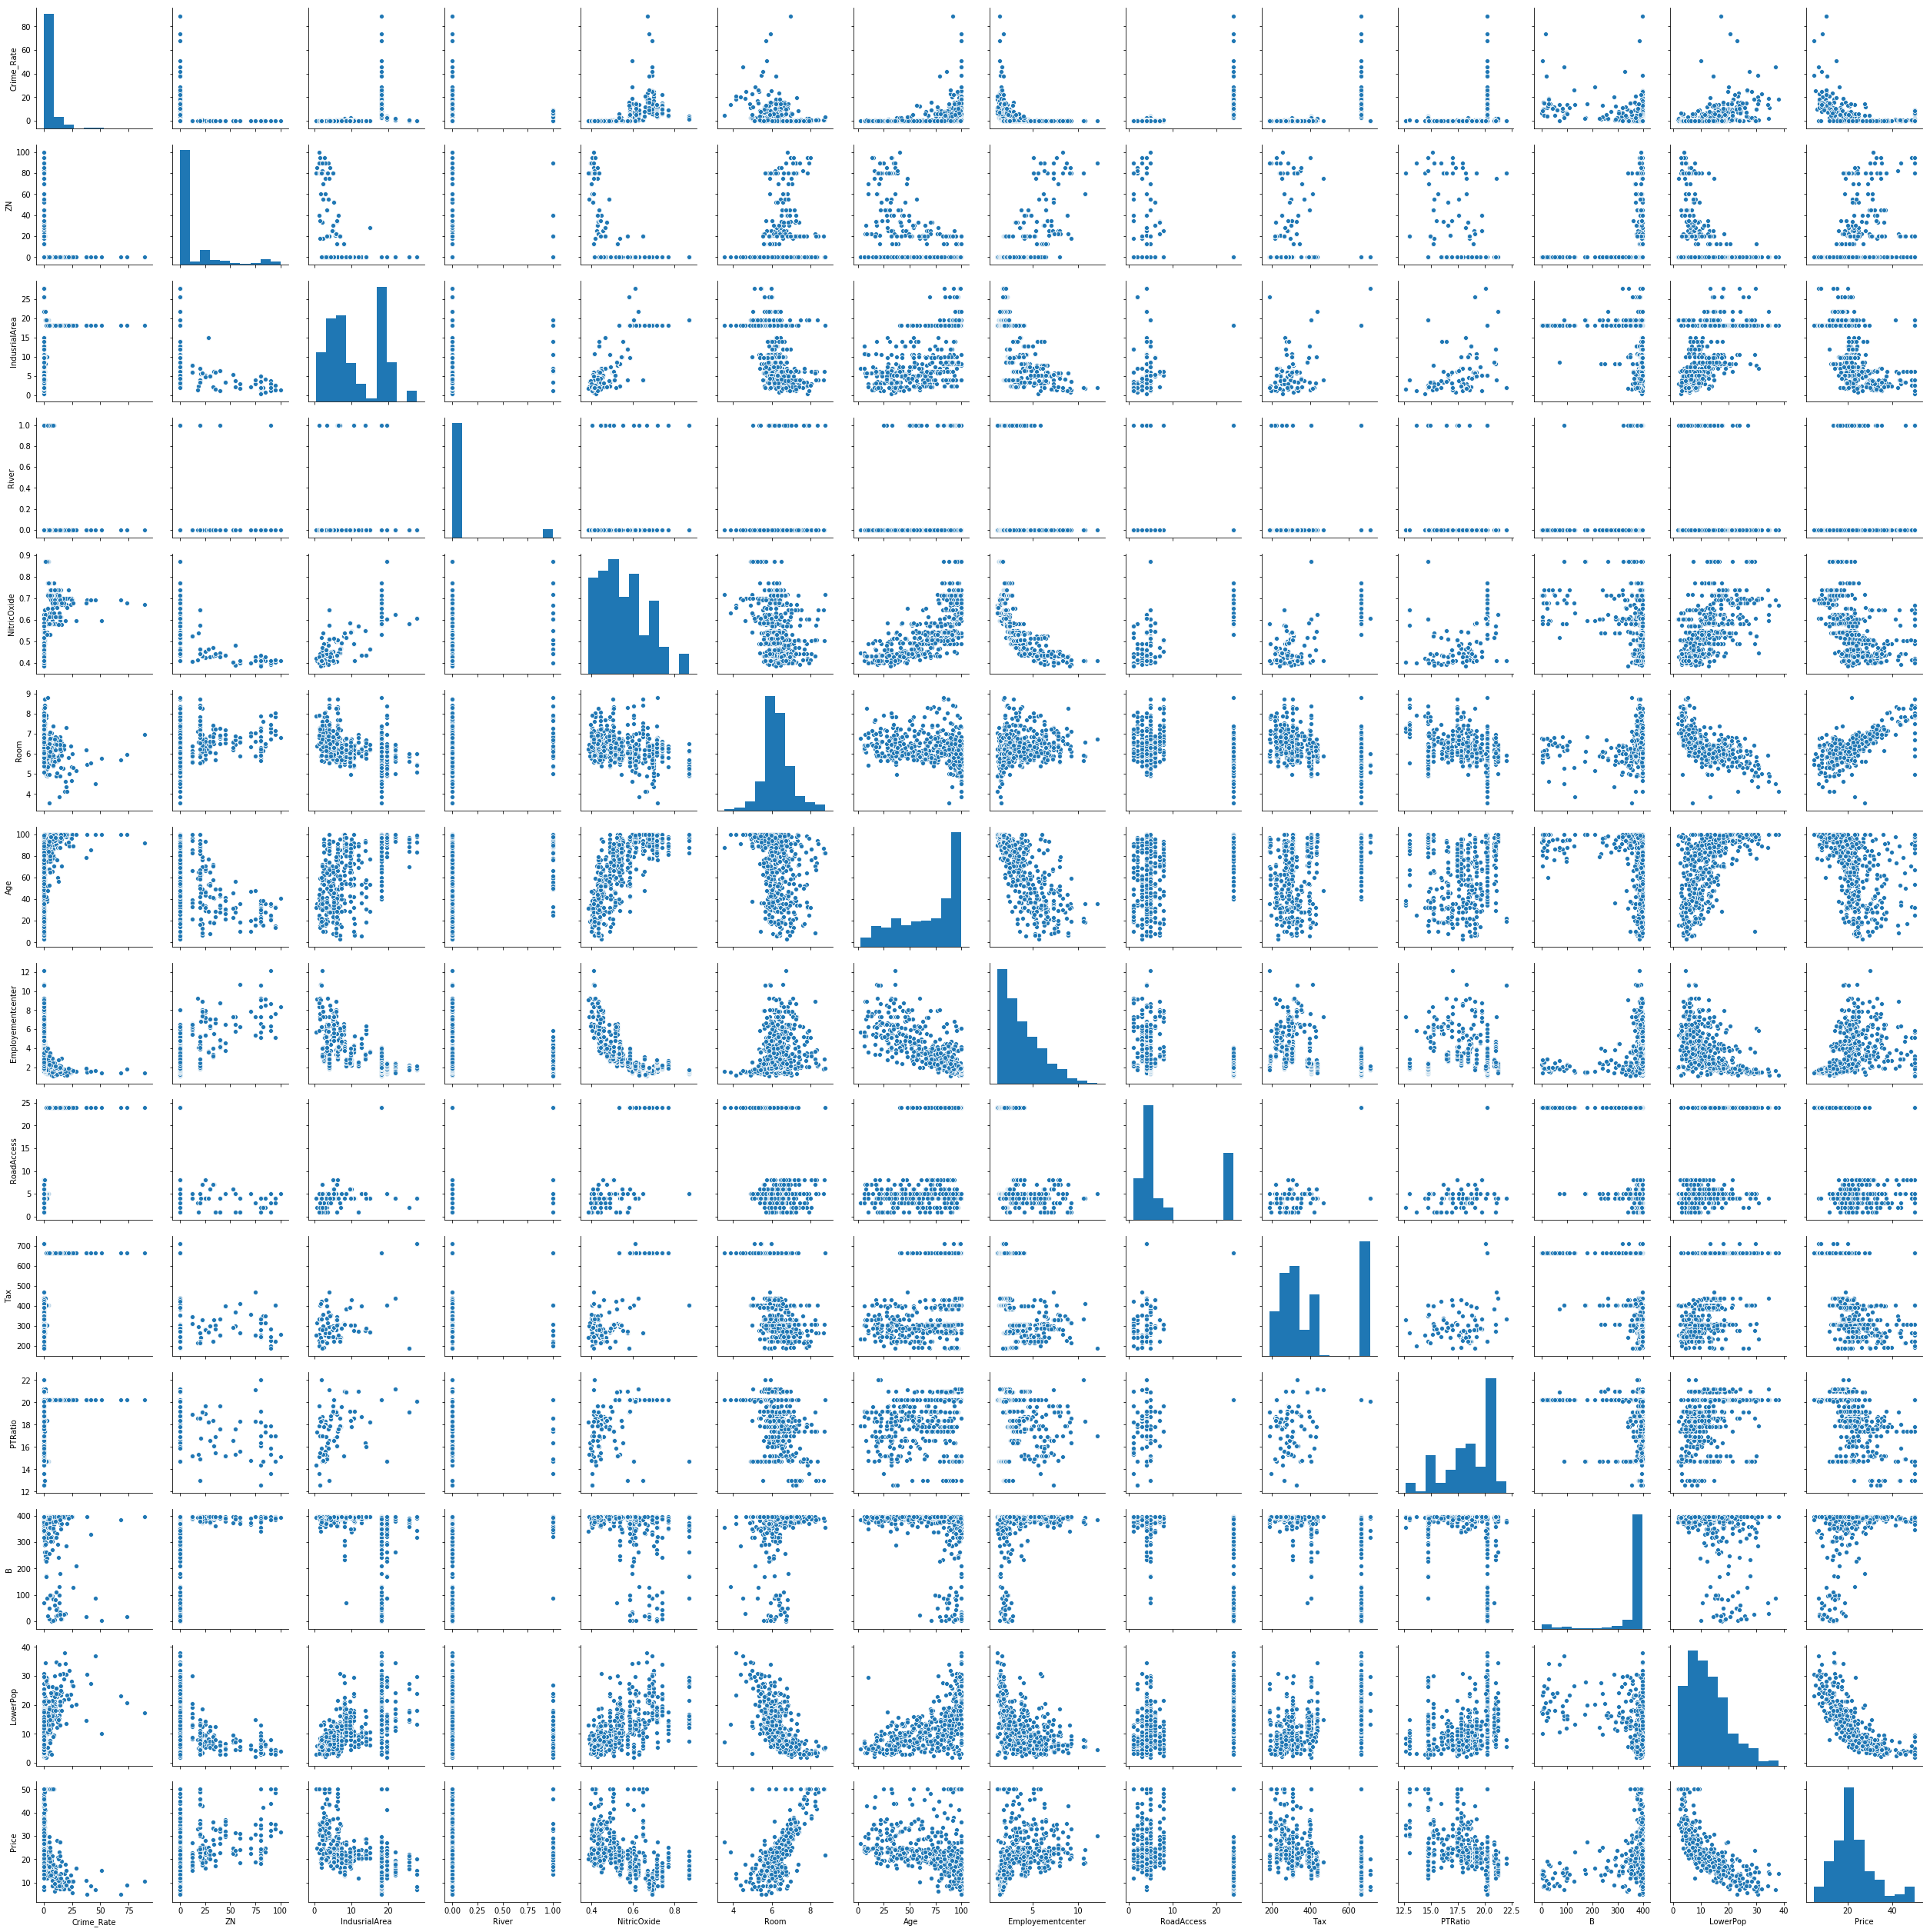

In [15]:
sns.pairplot(dataset)

In [16]:
features = dataset[['Crime_Rate', 'ZN', 'IndusrialArea', 'River', 'NitricOxide', 'Room',
       'Age', 'Employementcenter', 'RoadAccess', 'Tax', 'PTRatio', 'B',
       'LowerPop']]

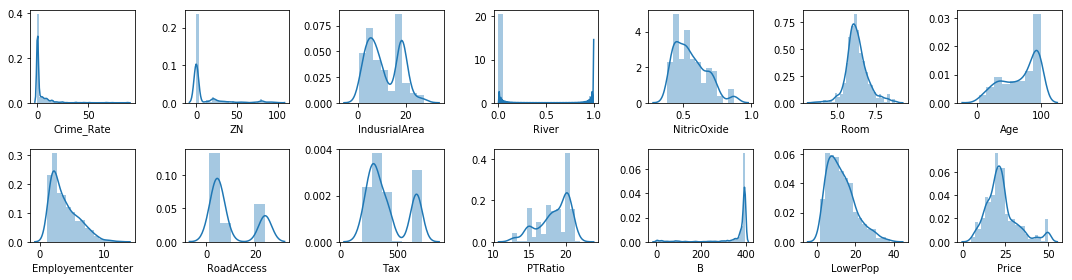

In [17]:
cols=7
rows=2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,4))
"""fig.suptitle('Ommale', y=1.2, size=22)"""
col=dataset.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(dataset[col[index]], ax=ax[i][j])
        index=index+1
plt.tight_layout()

In [18]:
heat = dataset.corr()

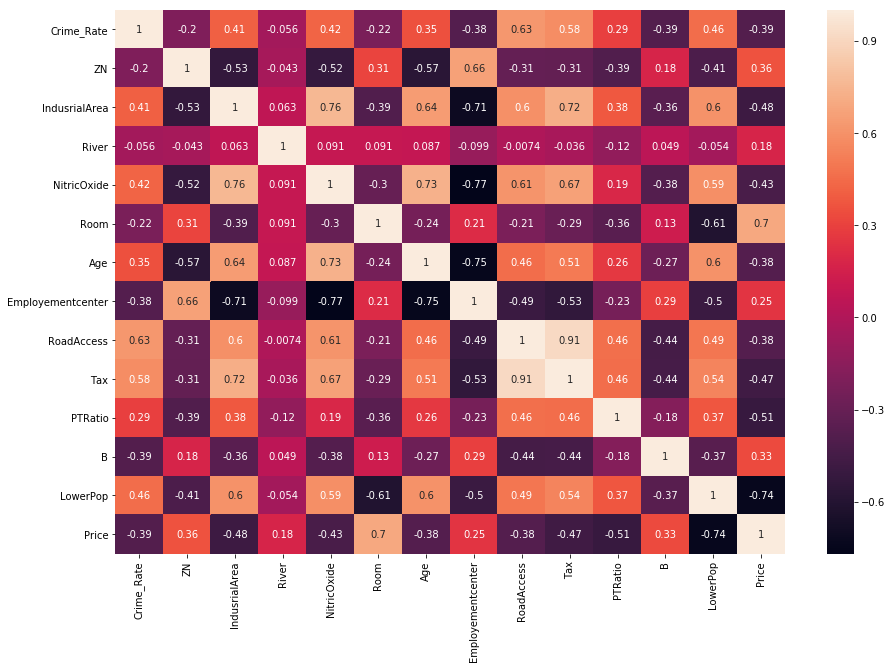

In [19]:
plt.subplots(figsize=(15,10))
sns.heatmap(heat, annot=True)

In [20]:
x = heat.index

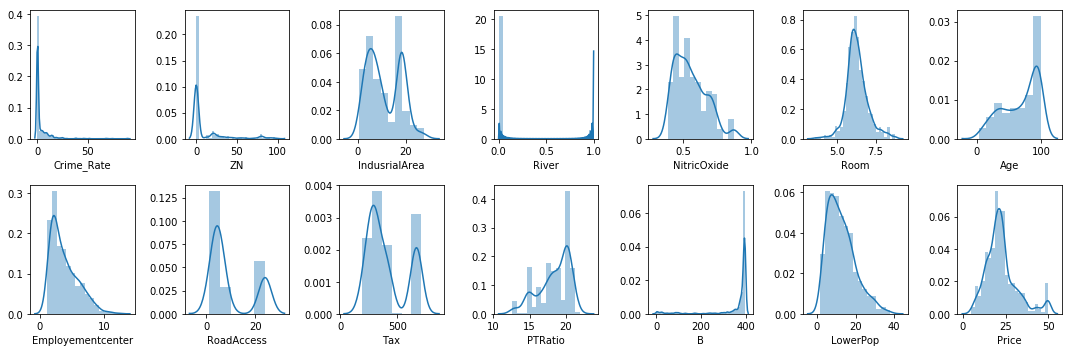

In [21]:
rows=2
cols=7
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,5))
index=0
for i in range(rows):
    for j in range (cols):
        sns.distplot(dataset[x[index]], ax=ax[i][j])
        index=index+1
plt.tight_layout()

In [22]:
def getfeatures(targetvariable, threshold):
    feature=[]
    value=[]
    for i, index in enumerate(heat.index):
        if abs(targetvariable[index])>threshold:
            feature.append(index)
            value.append(targetvariable[index])
    filtered_feature=pd.DataFrame(value, index=feature, columns=['P-Value'])
    return filtered_feature

In [23]:
selected_features = getfeatures(heat['Price'], 0.5)
selected_features

,P-Value
Room,0.695360
PTRatio,-0.507787
LowerPop,-0.737663
Price,1.000000


In [24]:
mldata = dataset[selected_features.index]
mldata.head()

,Room,PTRatio,LowerPop,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


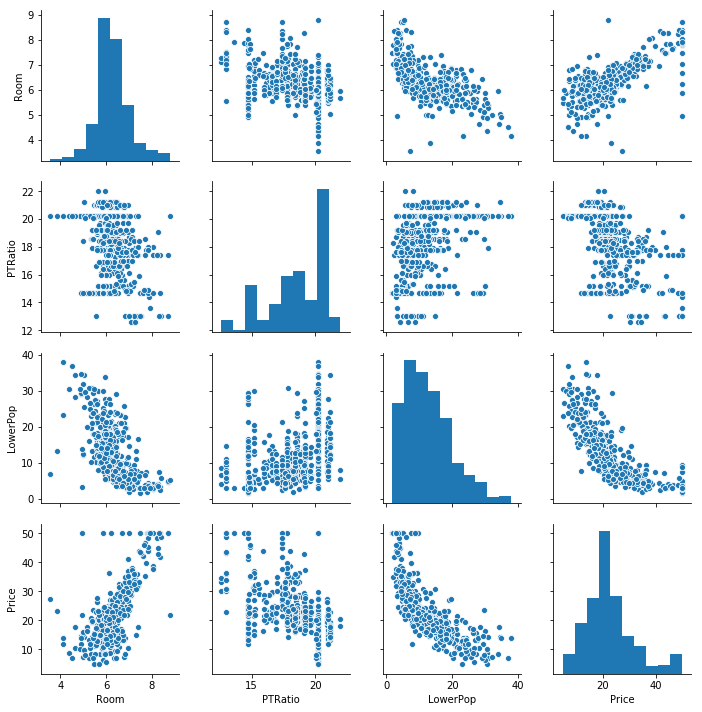

In [25]:
sns.pairplot(mldata)

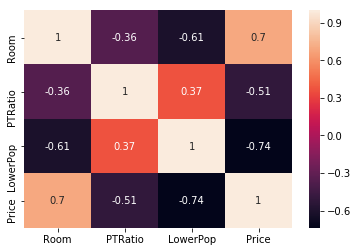

In [26]:
sns.heatmap(mldata.corr(), annot=True)

In [27]:
features=mldata[['Room', 'PTRatio', 'LowerPop']]

In [28]:
target=pd.DataFrame(mldata['Price'])

In [29]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.20, random_state=0)

In [30]:
lr = LinearRegression(normalize=True)

In [31]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [32]:
y_pred=lr.predict(x_test)

In [33]:
y_pred=pd.DataFrame(y_pred)

In [34]:
y_test.head()

,Price
329,22.6
371,50.0
219,23.0
403,8.3
78,21.2


In [35]:
y_pred.head()

,0
0,27.609031
1,22.099034
2,26.529255
3,12.507986
4,22.254879


In [36]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = r2_score(y_test, y_pred)

In [37]:
print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)

MAE: 4.404434993909257
MSE: 41.67799012221683
RMSE: 0.48816420156925067
